In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-83.17689681715225 -172.8090265350014
-60.73978953902351 63.03693362558798
63.734655096105115 -72.76378739278871
-10.239848773815439 -22.355448006651216
69.1918813542209 84.29651392481514
-67.10359686293498 95.76496800192956
57.72799649076197 163.12592385269852
25.428286814580247 40.025743810677085
-80.38433771288281 142.20590544810392
-3.7573945001845317 -86.7206976229282
-9.4483439206018 123.80308346274461
84.11240194343142 -179.14365142142032
28.136865885791806 -35.46112947025989
-49.279049703755646 166.23368952474874
0.7977357982613427 51.2027363977389
-23.614416023612705 -174.32054899165394
66.63725575856495 -157.1563002416
-86.51356969057221 -0.2257350346210103
-0.35620382001158646 157.50615404109146
-53.341804439898304 -20.713761113276405
-70.25783086674912 -32.79013217324376
19.505476270993668 35.00433100658603
36.96274918230054 11.101037247459487
-82.78010623510332 -59.013792020287795
-59.83648883523068 -169.38997690938578
-34.48816332521543 -33.85747057769544
7.06436147069361

15.69035445456835 73.70635900626169
-72.31805550754723 -165.59522864974986
44.122804239141516 -44.78099058304184
76.10129564744352 59.38822956400145
31.524497328470247 42.81414633341001
-14.569387821006814 -22.28507274876094
10.984033266950846 110.96267222956419
-83.87270723618002 106.4026595599766
-41.56875877512895 -8.93863648417613
5.319505663031805 122.42501494474703
-44.969475334475334 -37.224437232404426
1.8288020014465758 -64.33955388896297
17.29950580772494 51.218669335651754
-50.27676637249086 163.22482871635344
76.87988948699766 -90.43110188667032
46.03816235789321 126.08685351155714
80.24744444152643 -94.84870311448965
14.256579327426621 14.158812232343337
-70.3980617600061 114.0071585494436
-9.271701708171548 174.30662379549346
-33.32761511216259 103.96188527232005
88.76617135409714 6.823560493497297
-56.62339273575526 -120.09536252679078
-64.59850647626904 53.97250293538721
6.7962341828489485 -99.50025906006108
19.830455743093992 103.89325896504488
13.001324626670183 -2.06

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d4c01ee4a7bb7b17bffe2484c9ccd182


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | karaul
City not found. Skipping...
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | ossora
Processing Record 8 of Set 1 | umm lajj
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | san cristobal
Processing Record 11 of Set 1 | soe
Processing Record 12 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | hobyo
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | namatanai
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | barbar
City

Processing Record 37 of Set 4 | puerto madero
Processing Record 38 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 39 of Set 4 | lompoc
Processing Record 40 of Set 4 | quchan
Processing Record 41 of Set 4 | kaitangata
Processing Record 42 of Set 4 | constitucion
Processing Record 43 of Set 4 | plouzane
Processing Record 44 of Set 4 | lufilufi
Processing Record 45 of Set 4 | saint-junien
Processing Record 46 of Set 4 | tartus
Processing Record 47 of Set 4 | amderma
City not found. Skipping...
Processing Record 48 of Set 4 | geraldton
Processing Record 49 of Set 4 | moengo
Processing Record 50 of Set 4 | mount gambier
Processing Record 1 of Set 5 | waipawa
Processing Record 2 of Set 5 | kloulklubed
Processing Record 3 of Set 5 | pisco
Processing Record 4 of Set 5 | saldanha
Processing Record 5 of Set 5 | avarua
Processing Record 6 of Set 5 | novopokrovka
Processing Record 7 of Set 5 | norsup
Processing Record 8 of Set 5 | lincoln
Processing Record 9 of Set 5 | severo-

Processing Record 25 of Set 8 | mayumba
Processing Record 26 of Set 8 | belushya guba
City not found. Skipping...
Processing Record 27 of Set 8 | airai
Processing Record 28 of Set 8 | maine-soroa
Processing Record 29 of Set 8 | pringsewu
Processing Record 30 of Set 8 | ballina
Processing Record 31 of Set 8 | budogoshch
Processing Record 32 of Set 8 | coihaique
Processing Record 33 of Set 8 | belaya gora
Processing Record 34 of Set 8 | ampanihy
Processing Record 35 of Set 8 | kenai
Processing Record 36 of Set 8 | idaho falls
Processing Record 37 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 38 of Set 8 | rocha
Processing Record 39 of Set 8 | shirokiy
Processing Record 40 of Set 8 | kruisfontein
Processing Record 41 of Set 8 | dingle
Processing Record 42 of Set 8 | skelleftea
Processing Record 43 of Set 8 | kurkino
Processing Record 44 of Set 8 | basoko
Processing Record 45 of Set 8 | kerman
Processing Record 46 of Set 8 | harper
Processing Record 47 of Set 8 | vestman

Processing Record 12 of Set 12 | moron
Processing Record 13 of Set 12 | alihe
Processing Record 14 of Set 12 | panacan
Processing Record 15 of Set 12 | mednogorsk
Processing Record 16 of Set 12 | lafiagi
Processing Record 17 of Set 12 | pervomayskiy
Processing Record 18 of Set 12 | vostok
Processing Record 19 of Set 12 | bargal
City not found. Skipping...
Processing Record 20 of Set 12 | taoudenni
Processing Record 21 of Set 12 | pangnirtung
Processing Record 22 of Set 12 | grindavik
Processing Record 23 of Set 12 | ucluelet
Processing Record 24 of Set 12 | sokna
Processing Record 25 of Set 12 | hirara
Processing Record 26 of Set 12 | huntsville
Processing Record 27 of Set 12 | kangaatsiaq
Processing Record 28 of Set 12 | manggar
Processing Record 29 of Set 12 | popondetta
Processing Record 30 of Set 12 | luklukan
Processing Record 31 of Set 12 | whittlesea
Processing Record 32 of Set 12 | port moresby
Processing Record 33 of Set 12 | hamilton
Processing Record 34 of Set 12 | inhambane

KeyboardInterrupt: 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,73.87,65,98,13.38,TO,2022-07-26 05:00:24
1,Iqaluit,63.7506,-68.5145,41.70,93,71,4.00,CA,2022-07-26 05:00:25
2,Georgetown,5.4112,100.3354,89.53,73,20,5.75,MY,2022-07-26 04:56:54
3,Busselton,-33.6500,115.3333,61.70,77,98,16.22,AU,2022-07-26 04:58:15
4,Ossora,59.2353,163.0719,61.29,72,53,6.08,RU,2022-07-26 05:00:26
5,Umm Lajj,25.0213,37.2685,86.09,58,52,2.84,SA,2022-07-26 05:00:26
6,Hobart,-42.8794,147.3294,61.05,65,40,4.61,AU,2022-07-26 05:00:14
7,San Cristobal,7.7669,-72.2250,64.36,92,76,2.48,VE,2022-07-26 05:00:27
8,Soe,-9.8607,124.2840,78.53,42,21,9.33,ID,2022-07-26 05:00:27
9,Ribeira Grande,38.5167,-28.7000,73.99,89,12,5.84,PT,2022-07-26 05:00:28


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-07-26 05:00:24,-21.2000,-175.2000,73.87,65,98,13.38
1,Iqaluit,CA,2022-07-26 05:00:25,63.7506,-68.5145,41.70,93,71,4.00
2,Georgetown,MY,2022-07-26 04:56:54,5.4112,100.3354,89.53,73,20,5.75
3,Busselton,AU,2022-07-26 04:58:15,-33.6500,115.3333,61.70,77,98,16.22
4,Ossora,RU,2022-07-26 05:00:26,59.2353,163.0719,61.29,72,53,6.08
5,Umm Lajj,SA,2022-07-26 05:00:26,25.0213,37.2685,86.09,58,52,2.84
6,Hobart,AU,2022-07-26 05:00:14,-42.8794,147.3294,61.05,65,40,4.61
7,San Cristobal,VE,2022-07-26 05:00:27,7.7669,-72.2250,64.36,92,76,2.48
8,Soe,ID,2022-07-26 05:00:27,-9.8607,124.2840,78.53,42,21,9.33
9,Ribeira Grande,PT,2022-07-26 05:00:28,38.5167,-28.7000,73.99,89,12,5.84


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

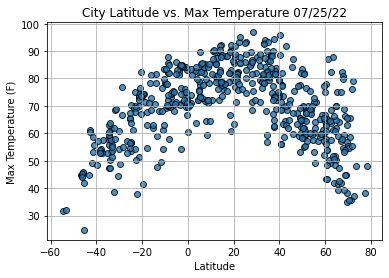

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

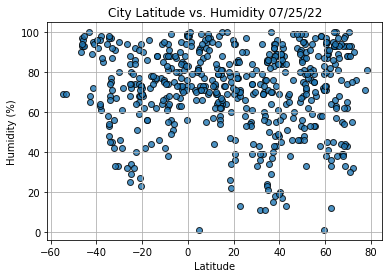

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

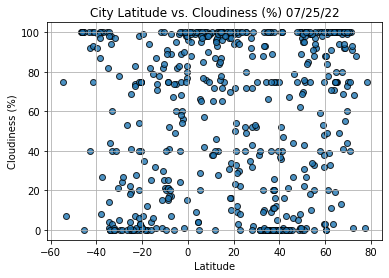

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

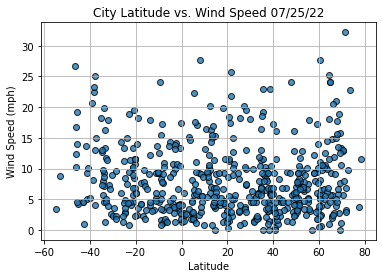

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()